In [87]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

Original Image Shape : (1024, 1024)


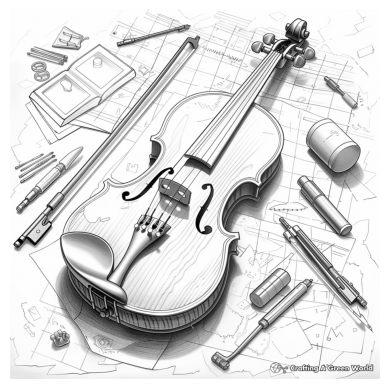

In [88]:
A = imread('violin3.png')
X = np.mean(A, -1)
print (f'Original Image Shape : {X.shape}')

image = plt.imshow(X)
image.set_cmap('gray')
plt.axis('off')
plt.show()

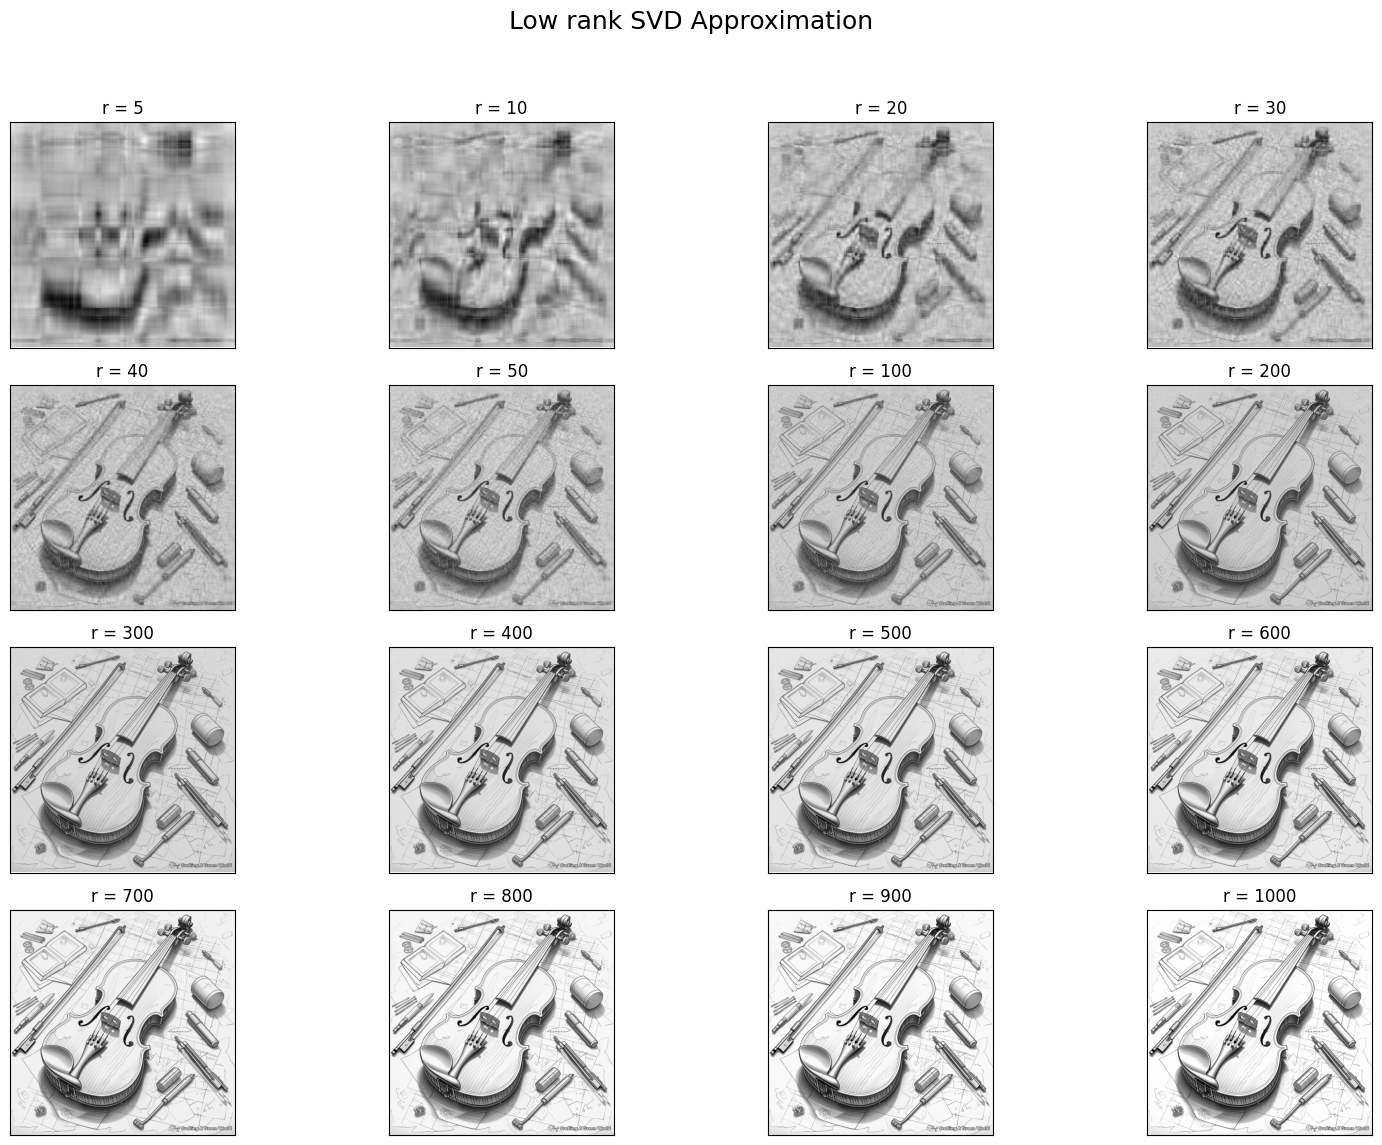

In [89]:
U, S_vals, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S_vals)

ranks = [5, 10, 20, 30,
         40, 50, 100, 200,
         300, 400, 500, 600,
         700, 800, 900, 1000]

fig, axes = plt.subplots(4, 4, figsize=(16, 12),
                         subplot_kw={'xticks':[], 'yticks':[]})
fig.suptitle("Low rank SVD Approximation", fontsize=18)

for ax, r in zip(axes.flat, ranks):
    Ur = U[:, :r]
    Sr = np.diag(S_vals[:r])
    VTr = VT[:r, :]
    Xr = Ur @ Sr @ VTr

    ax.imshow(Xr, cmap='gray')
    ax.set_title(f"r = {r}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

`Truncating` ; How to find an optimal lower rank ?

energy cutoff r = 251 (captures 99.50% energy)


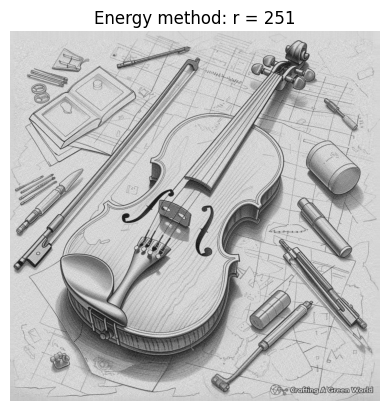

In [90]:
tau = 0.995

sigma2 = S_vals**2
cum_energy = np.cumsum(sigma2) / np.sum(sigma2)

r_energy = np.searchsorted(cum_energy, tau) + 1
print(f"energy cutoff r = {r_energy} (captures {cum_energy[r_energy-1]*100:.2f}% energy)")

X_e = U[:,:r_energy] @ np.diag(S_vals[:r_energy]) @ VT[:r_energy,:]
plt.figure()
plt.imshow(X_e, cmap='gray')
plt.axis('off')
plt.title(f"Energy method: r = {r_energy}")
plt.show()

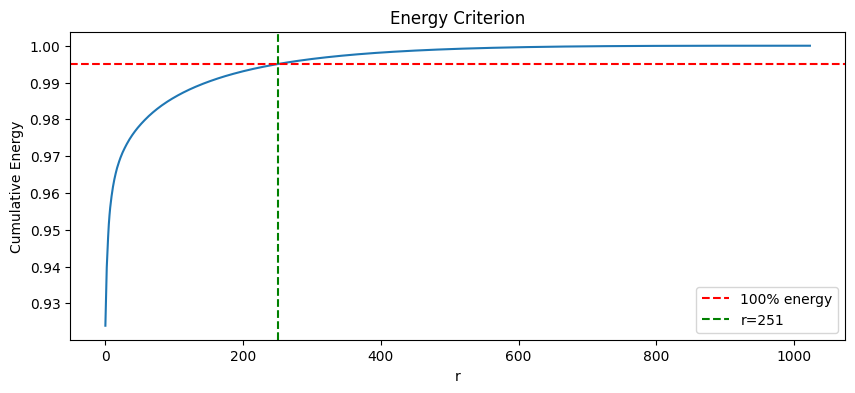

In [91]:
plt.figure(figsize=(10,4))
plt.plot(cum_energy)
plt.axhline(tau, color='red', linestyle='--', label=f'{tau*100:.0f}% energy')
plt.axvline(r_energy-1, color='green', linestyle='--', label=f'r={r_energy}')
plt.xlabel('r'); plt.ylabel('Cumulative Energy'); plt.legend()
plt.title('Energy Criterion')
plt.show()

`Compression Ratio`

In [92]:
m,n = X.shape
r = r_energy
print(f'Compression Ratio = {((m*n)/(r*(m+n+1))):.3f}')
print (f'Compression Percentage = {((r*(m+n+1))/(m*n)) * 100:.2f}%')

Compression Ratio = 2.039
Compression Percentage = 49.05%
